In [1]:
import machine_learning_data as mld
import machine_learning_plotting as mlp
import machine_learning_training as mlt
import machine_learning_dataloading as mldl
from download_csv import *
from machine_learning_BERT_articles import *
from create_tensor import *

import importlib

importlib.reload(mlp)
importlib.reload(mld)
importlib.reload(mlt)
importlib.reload(mldl)

/home/conner/AI_project/finance_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-06-24 15:53:17.731250: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-24 15:53:17.739103: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750773197.748386  581093 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750773197.751145  581093 cuda_blas.cc:

<module 'machine_learning_dataloading' from '/home/conner/machine_learning_stock_prediction/src/machine_learning_dataloading.py'>

# Create data folder and import data

In [3]:
import os
import requests
import zipfile
import shutil

# Define paths and URL
url = 'https://polybox.ethz.ch/index.php/s/R99PSQwT9e9CjYy/download'
zip_path = '../data_temp.zip'
extract_path = '../'
final_data_path = '../data'
external_zip_path = '/home/conner/machine_learning_stock_prediction/Data for Stock Prediction.zip'

# Download the ZIP file
response = requests.get(url)
with open(zip_path, 'wb') as file:
    file.write(response.content)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Rename the extracted folder
extracted_folder = '../Data for Stock Prediction'
if os.path.exists(final_data_path):
    shutil.rmtree(final_data_path)
os.rename(extracted_folder, final_data_path)

# Remove the downloaded zip file
os.remove(zip_path)

# ALSO remove external zip file if it exists
if os.path.exists(external_zip_path):
    os.remove(external_zip_path)


## Download data (not needed if you extract from polybox)

In [ ]:
# # Define the tickers and date range
# # tickers = ['^GSPC', 'EURUSD=X', 'BTC-USD']  # Example tickers: S&P 500, EUR/USD exchange rate, Bitcoin
# tickers = ['^GSPC']  # Example tickers: S&P 500, EUR/USD exchange rate, Bitcoin
start_date = '2024-06-01'
end_date = datetime.now().strftime('%Y-%m-%d')  # Current date

folder = "../data"

# # example usage
tickers = ['^GSPC']  # Example tickers: S&P 500, EUR/USD exchange rate, Bitcoin

# download_financial_data(tickers, start_date, end_date, 'financial_data.csv', folder=folder)

# download_gdp_data(start_date, end_date, 'gdp_data.csv', folder=folder)

# download_inflation_data(start_date, end_date, 'inflation_data.csv', folder=folder)

# download_interest_rate_data(start_date, end_date, 'interest_rate_data.csv', folder=folder)

# download_unemployment_rate_data(start_date, end_date, 'unemployment_rate_data.csv', folder=folder)

# download_exchange_rate_data(start_date, end_date, 'exchange_rate_data.csv', folder=folder)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [9]:
start_date = '2024-02-01'
end_date = '2024-03-01'  


inputs = {
    "from_date": start_date,
    "to_date": end_date,
    "output_folder": folder,
    "chunk_size_days": 3,
    "max_workers": 10
}



# analyze_and_save_sentiment(symbol="^GSPC", output_filename="SP500_sentiment_gpu_parallel.csv", **inputs)

# analyze_and_save_sentiment(symbol="AAPL", output_filename="apple_sentiment_gpu_parallel.csv", **inputs)

# analyze_and_save_sentiment(symbol="MSFT", output_filename="microsoft_sentiment_gpu_parallel.csv", **inputs)

# analyze_and_save_sentiment(symbol="TSLA", output_filename="tesla_sentiment_gpu_parallel.csv", **inputs)

# analyze_and_save_sentiment(symbol="AMZN", output_filename="amazon_sentiment_gpu_parallel.csv", **inputs)

# analyze_and_save_sentiment(symbol="NVDA", output_filename="nvidia_sentiment_gpu_parallel.csv", **inputs)

In [ ]:
create_csv_with_sentiment_month(input_csv="../data/SP500_sentiment_gpu_parallel.csv", output_csv="../data/SP500_sentiment_gpu_parallel_filtered.csv", filter=True)
create_csv_with_sentiment_month(input_csv="../data/apple_sentiment_gpu_parallel.csv", output_csv="../data/apple_sentiment_gpu_parallel_filtered.csv", filter=True)
create_csv_with_sentiment_month(input_csv="../data/microsoft_sentiment_gpu_parallel.csv", output_csv="../data/microsoft_sentiment_gpu_parallel_filtered.csv", filter=True)
create_csv_with_sentiment_month(input_csv="../data/tesla_sentiment_gpu_parallel.csv", output_csv="../data/tesla_sentiment_gpu_parallel_filtered.csv", filter=True)
create_csv_with_sentiment_month(input_csv="../data/amazon_sentiment_gpu_parallel.csv", output_csv="../data/amazon_sentiment_gpu_parallel_filtered.csv", filter=True)



Filtered out rows where 'used_full_article' is False.
Sentiment analysis results saved to ../data/SP500_sentiment_gpu_parallel_filtered.csv
Filtered out rows where 'used_full_article' is False.
Sentiment analysis results saved to ../data/apple_sentiment_gpu_parallel_filtered.csv
Filtered out rows where 'used_full_article' is False.
Sentiment analysis results saved to ../data/microsoft_sentiment_gpu_parallel_filtered.csv
Filtered out rows where 'used_full_article' is False.
Sentiment analysis results saved to ../data/tesla_sentiment_gpu_parallel_filtered.csv
Filtered out rows where 'used_full_article' is False.
Sentiment analysis results saved to ../data/amazon_sentiment_gpu_parallel_filtered.csv


# Visualise temporal evolution

In [7]:
tensor_data, loaded_data = mldl.create_tensor_from_csvs(['../data/financial_data.csv', 
                                                       '../data/gdp_data.csv', 
                                                       '../data/interest_rate_data.csv',
                                                       '../data/inflation_data.csv',
                                                       '../data/unemployment_rate_data.csv',
                                                       '../data/SP500_sentiment_gpu_parallel_filtered.csv'
                                                       ])

Loaded ../data/financial_data.csv with columns: ['date', 'Open', 'High', 'Low', 'Close', 'Volume']
Loaded ../data/gdp_data.csv with columns: ['date', 'gdp']
Loaded ../data/interest_rate_data.csv with columns: ['date', 'interest_rate']
Loaded ../data/inflation_data.csv with columns: ['date', 'inflation']
Loaded ../data/unemployment_rate_data.csv with columns: ['date', 'unemployment_rate']
Loaded ../data/SP500_sentiment_gpu_parallel_filtered.csv with columns: ['date', 'negative', 'neutral', 'positive']
Column 'negative' appears to contain monthly data. Extending values...
Column 'neutral' appears to contain monthly data. Extending values...
Column 'positive' appears to contain monthly data. Extending values...
After extending monthly data: (386, 13)
After handling NaN values: (386, 13)
Created tensor with shape: torch.Size([386, 12])
        date        Open        High         Low       Close      Volume  \
0 2024-06-01  192.002071  194.082354  191.623850  193.126816  50080500.0   
1 20

Generating financial data plots from tensor data...


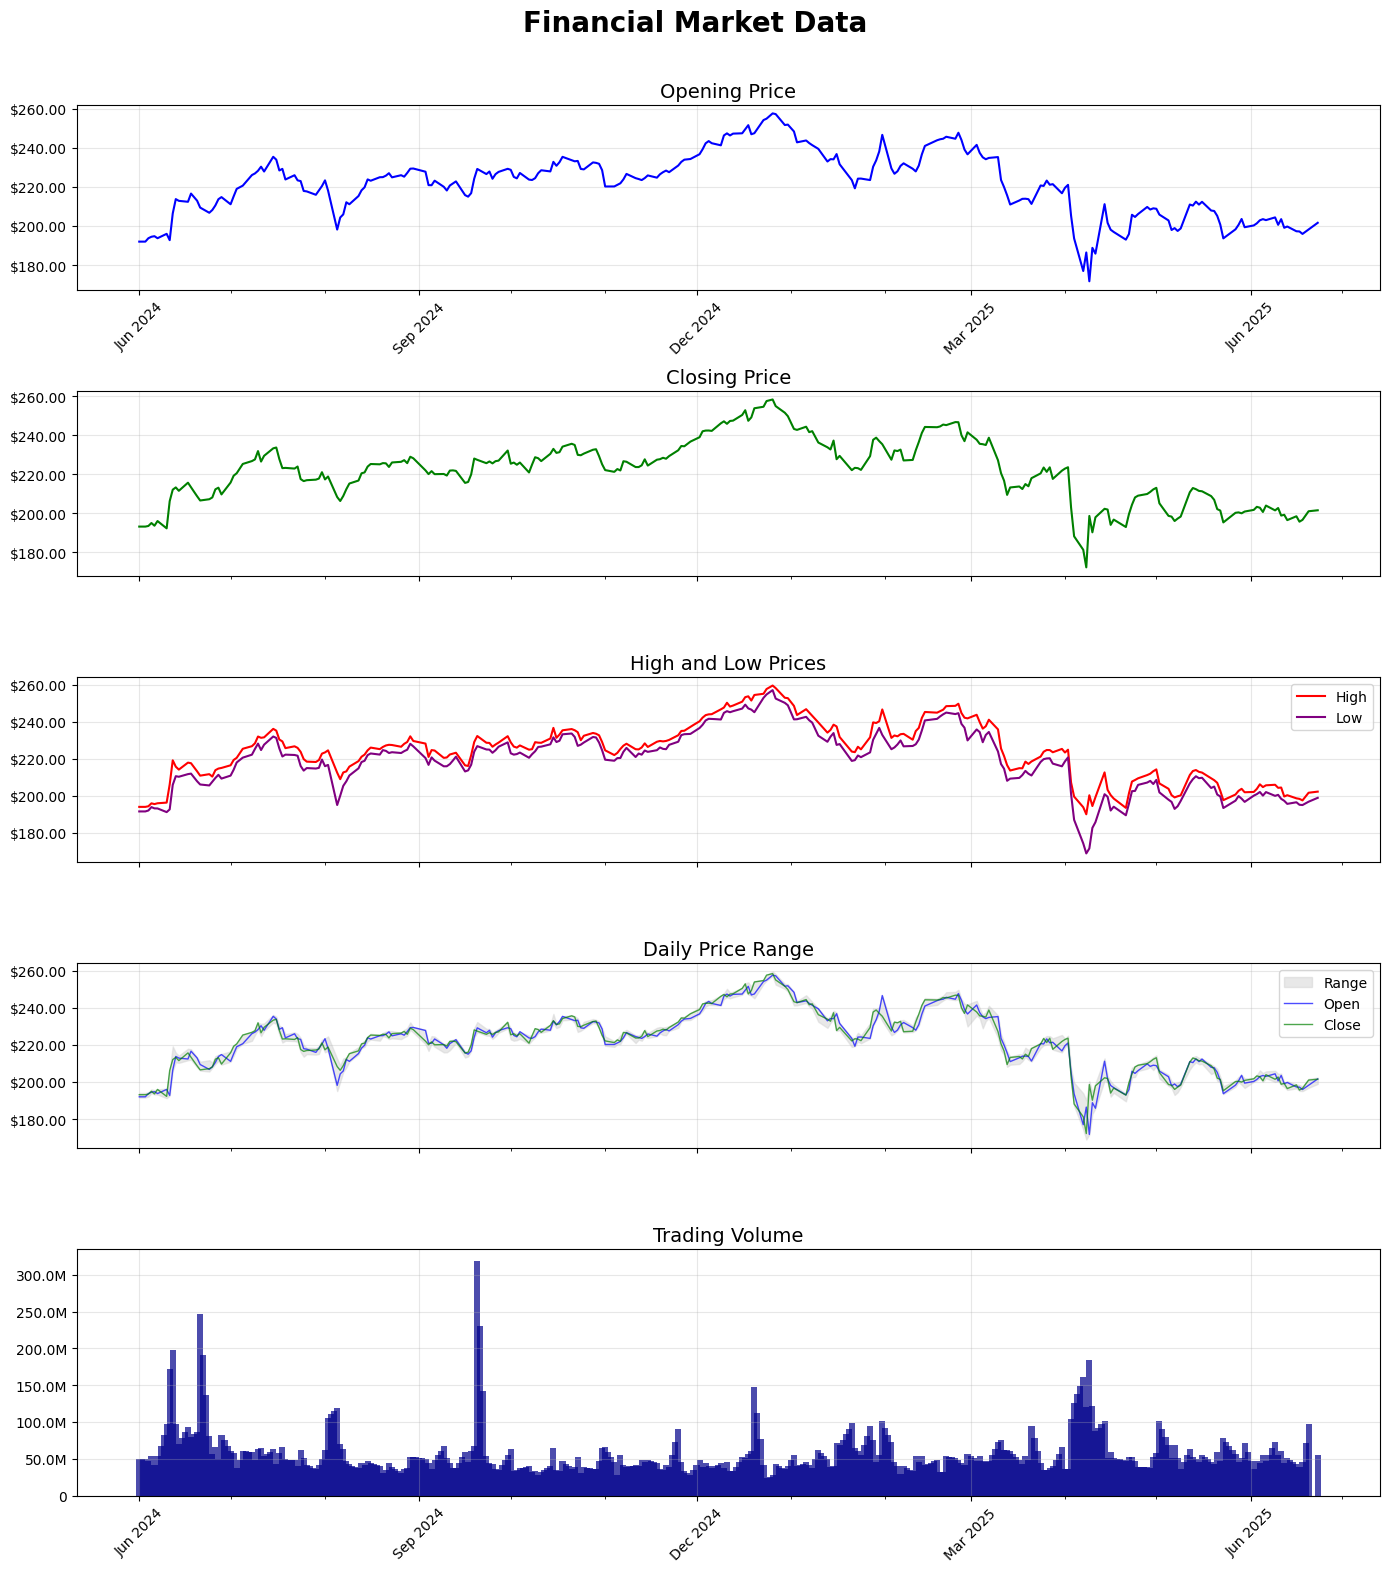

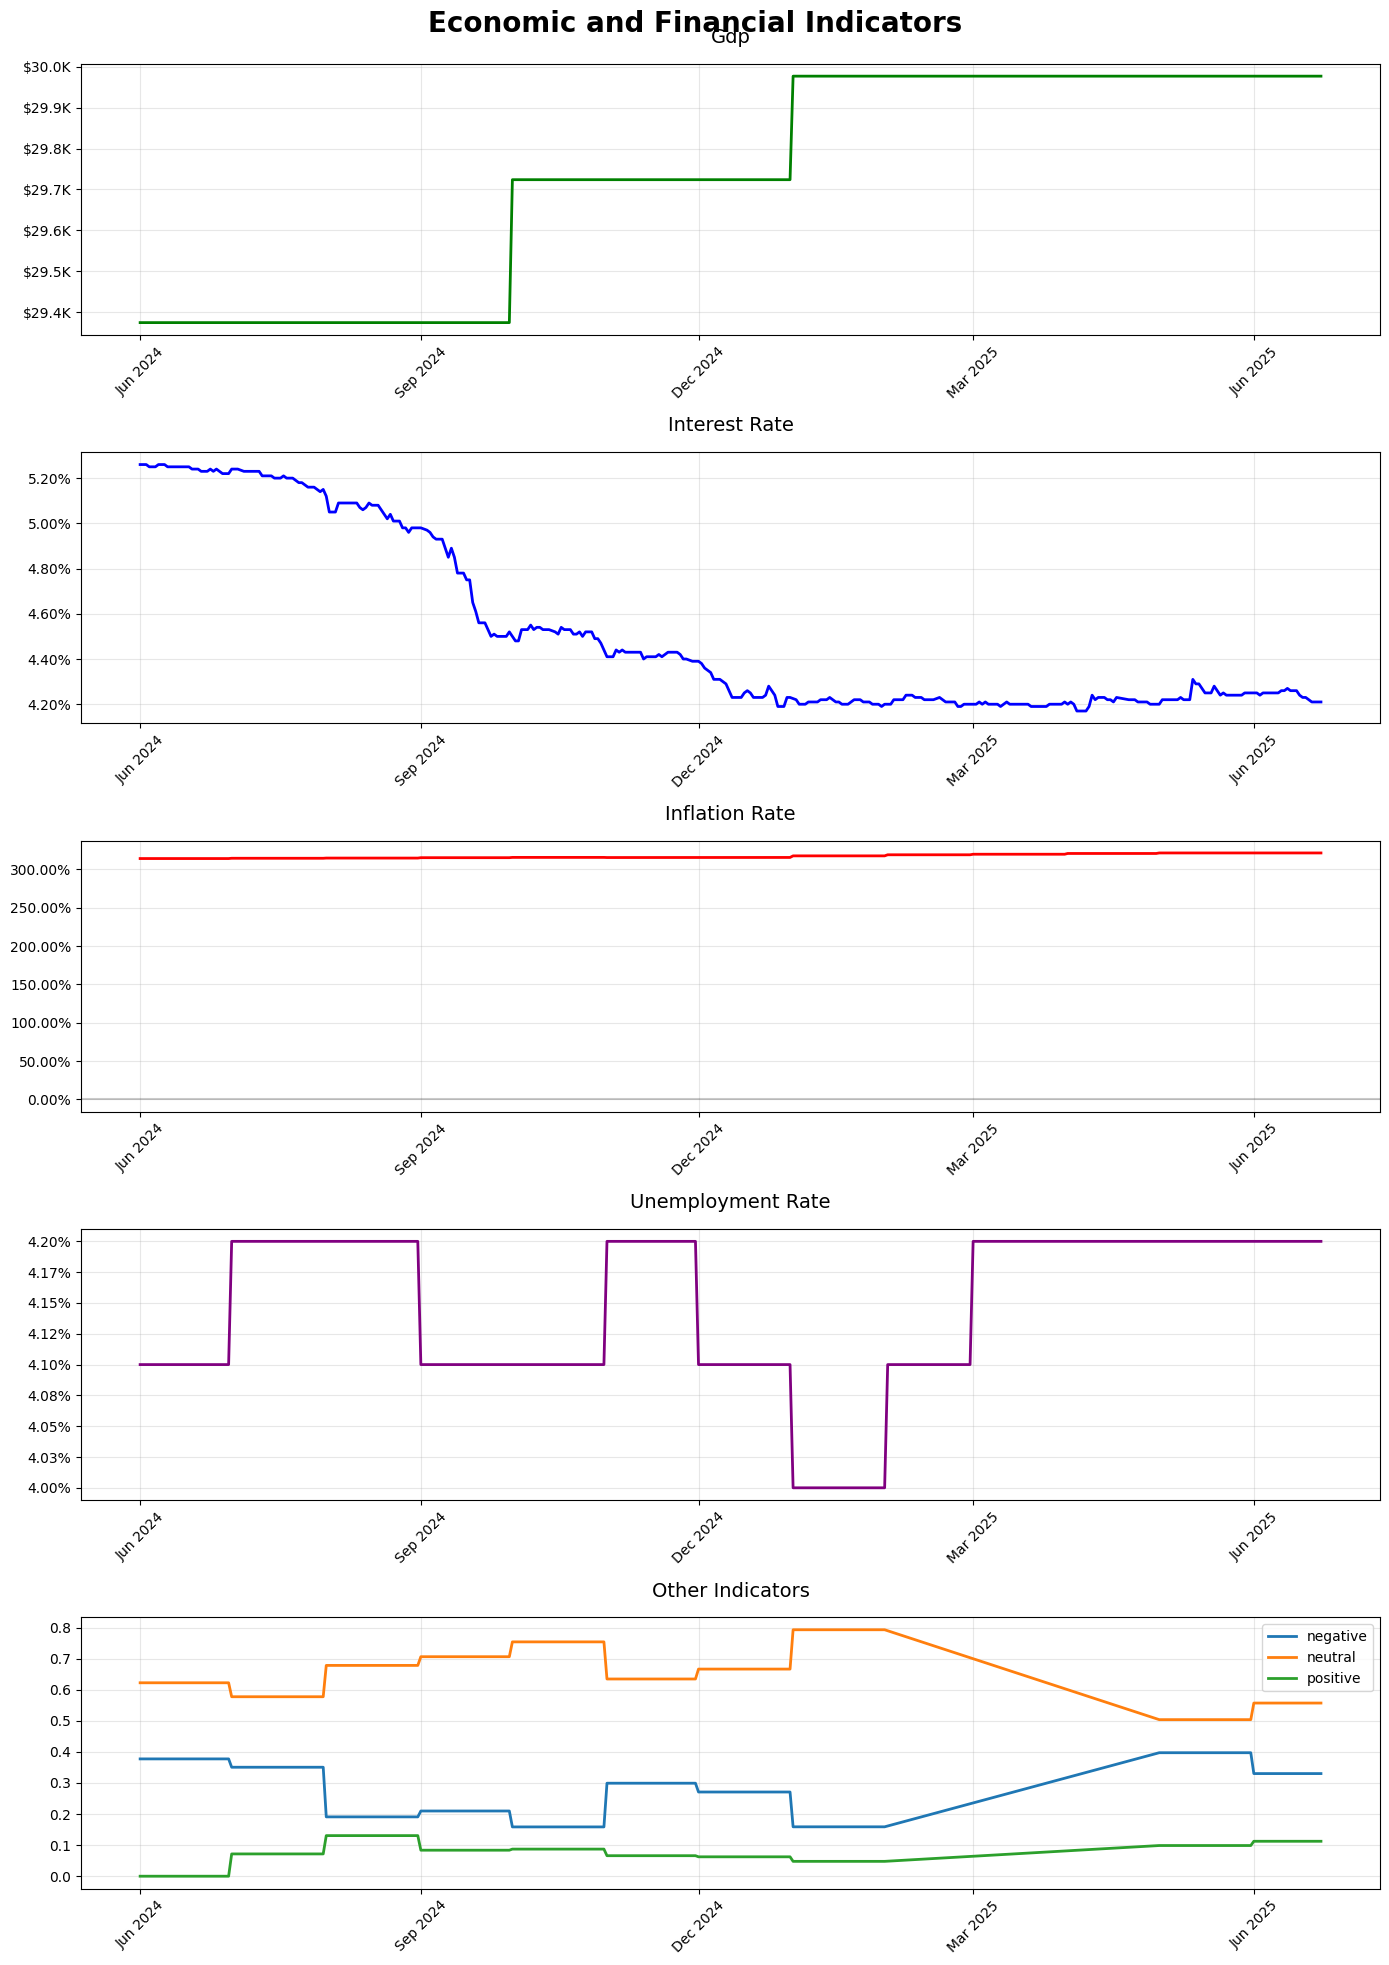

Financial data plots generated successfully


In [8]:
mlp.plot_financial_data_from_tensor(loaded_data, plot=True)

# Correlate different quantities


Creating focused correlation plot for Volume, Close price and economic indicators...
Selected 9 variables for focused correlation analysis
Using 386 complete rows for correlation analysis


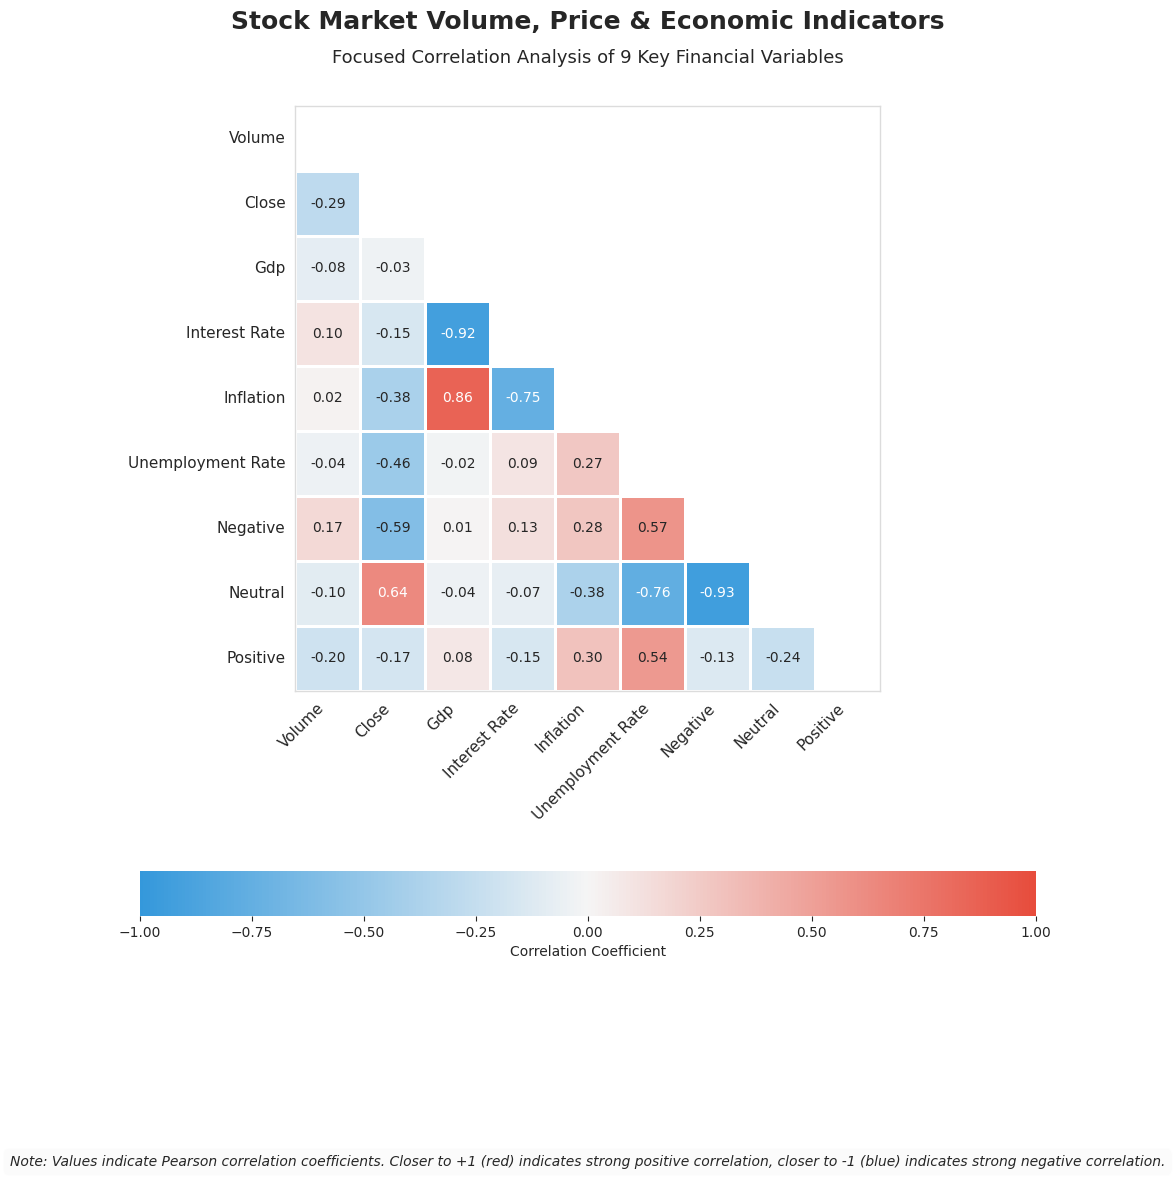

In [9]:
corr_matrix, found_vars, corr_df = mlp.create_half_correlation_plot3(loaded_data, plot = True, save= False)

# LSTM-RNN

In [ ]:
# Add this cell to check your data structure
print("Keys in loaded_data:", loaded_data.keys())
print("Type of loaded_data:", type(loaded_data))

In [ ]:
import importlib
import machine_learning_training as mlt
importlib.reload(mld)  # Force reload the module to get the latest changes

# Then run the prediction again
dates, predictions, actuals, std_devs = mlt.parallelized_rolling_window_prediction_for_financial_data2(
    tensor_data,
    target_variable='Open',
    sequence_length=15,
    epochs=20,
    hidden_dim=128,
    num_layers=3,
    batch_size=32,
    mc_samples=30,
    use_features=True
)